In [2]:
from IPython.display import Image

# Identifying Potential Toronto Neighborhood(s) To Open A Profitable Coffee Shop

## The Problem

In this hypothetical situation, our client, who is an entrepreneur, wants to open an independent coffee shop in Toronto. My job, as a data scientist working on the project, is to use data science and analysis to recommend a list of such possible neighborhoods.

## Introduction

Toronto is the largest city and the financial capital of Canada. And as one would expect, its market for coffee shops, for the most part, is already being served by existing businesses. With that in perspective, we give special attention to the following factors to search for opportunities remaining in this highly competitive market:

1. Population: The neighborhood has to have a large enough population for a new coffee shop to find its own patrons.

2. Average Income: After accounting for employees, rent and utilities the price of a cup of coffee will have to be on the higher end for a business to survive. Being in a neighborhood with average income in the top 25% percent would offset for such pricing and would be ideal.

3. Walkability: New coffee shops usually do better when there is foot traffic and people take the risk of exploring new venues. A higher Walk Score would make for a better potential cadidate.

4. Business atmosphere: We want to see a lot of already successful businesses and low debt risk score in the neighborhood, general indicators of a good business environment. Moreover, the existence of multiple successful coffee shops would be a huge plus.

5. Parks and Playgrounds: Such public spaces for recreation invites lots of people, including new faces, everyday. This is especially true in large cities.

We want to be in a cluster which has high scores is as many of the five factors above as possible.


## Data

Sources of data used in the analysis are listed below:
1. Geographical Coordinates - Foursquare API[[1](https://developer.foursquare.com/places)] and OpenStreetMap Nominatim package[[2](https://nominatim.org/)]

2. Population, Average income - Wikipedia[[3](https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods)]

3. Walkability - Wellbeing Toronto Civics Equity Indicators (Toronto Open Data)[[4](https://open.toronto.ca/catalogue/?sort=last_refreshed%20desc)]

4. Businesses, Debt Risk Score - Wellbeing Toronto Economics (Toronto Open Data)[[4](https://open.toronto.ca/catalogue/?sort=last_refreshed%20desc)]

5. Venues including Coffee shops, Parks and Playgrounds - Foursquare API[[1](https://developer.foursquare.com/places)]


Data on population, average income, walkability, neighborhood businesses including coffee shops and recreational spaces were analyzed to evaluate the five factors of each neighborhood, as highlighted in the introduction. They were combined together into a single dataframe as all of them add to the positive outlook of a neighborhood. The data was then normalized to ensure they all have equal weight in any futher analysis. 

## Methodology

The goal of this project is to create a short list of 1-5 most prospective neighborhoods. The introduction section explains specific reasons behind why certain features were selected. We are looking for a location in an affluent neighborhood or close to it, with a variety of successful businesses around, including other highly rated coffee shops. A walkable neighborhood opens up the possiblity of people taking a chance on a new venue. Recreational spaces also draw significant crowd in big cities, bringing new people to the area who are also potential customers. 

We are looking to create a short list, which makes the problem well suited for K Means Clustering. We start out by scraping the table from the Wikipedia article on demographics of Toronto neighborhoods [[3](https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods)]. The table is cleaned up and only neighborhood name, population and average income are included in the df_demographics dataframe.

Data on the Walk Score of each neighborhood came from the 'Wellbeing Toronto Civics Equity Indicators' dataset obtained through Toronto Open Data initiative[[4](https://open.toronto.ca/catalogue/?sort=last_refreshed%20desc)]. I saved the Walk Score data in the df_walkability dataframe. The data for the third dataframe, df_economics, came from 'Wellbeing Toronto Dataset', again obtained through Toronto Open Data initiative[[4](https://open.toronto.ca/catalogue/?sort=last_refreshed%20desc)]. As the name suggests, the dataset contains economic indicators of Toronto neighborhoods. Only data on number of businesses and debt risk score are saved in the df_economics dataframe. 

The three dataframes df_demographics, df_walkability and df_economics are combined into a single dataframe df_combined. I clustered them into 8 clusters using K means clustering algorithm and chose only two clusters whose centroids were farthest from the origin in terms of Euclidean distance. Each of the two clusters had one neighborhood each, giving us a short list of only two neighborhoods.

Finally, it's important to note that I could find complete data on only 74 Toronto neighborhoods. The project focuses on those 74 neighborhoods.

## Results

As mentioned in an earlier section three dataframes were merged to create a single dataframe df_combined:

1. df_demographics;

2. df_walkability; and,

3. df_economics.

Futhermore, data from Foursquare on the number of cafes and playgrounds/parks within top 100 venues in the neighborhood were added to the dataframe. Only those 74 neighborhoods that had complete information for all the fields in df_combined were chosen for further analysis. The neighborhoods were plotted on a map of Toronto to illustrate their spatial distribution (see screenshots below). Geographical coordinates were removed and the data was normalized before performing K means clustering.

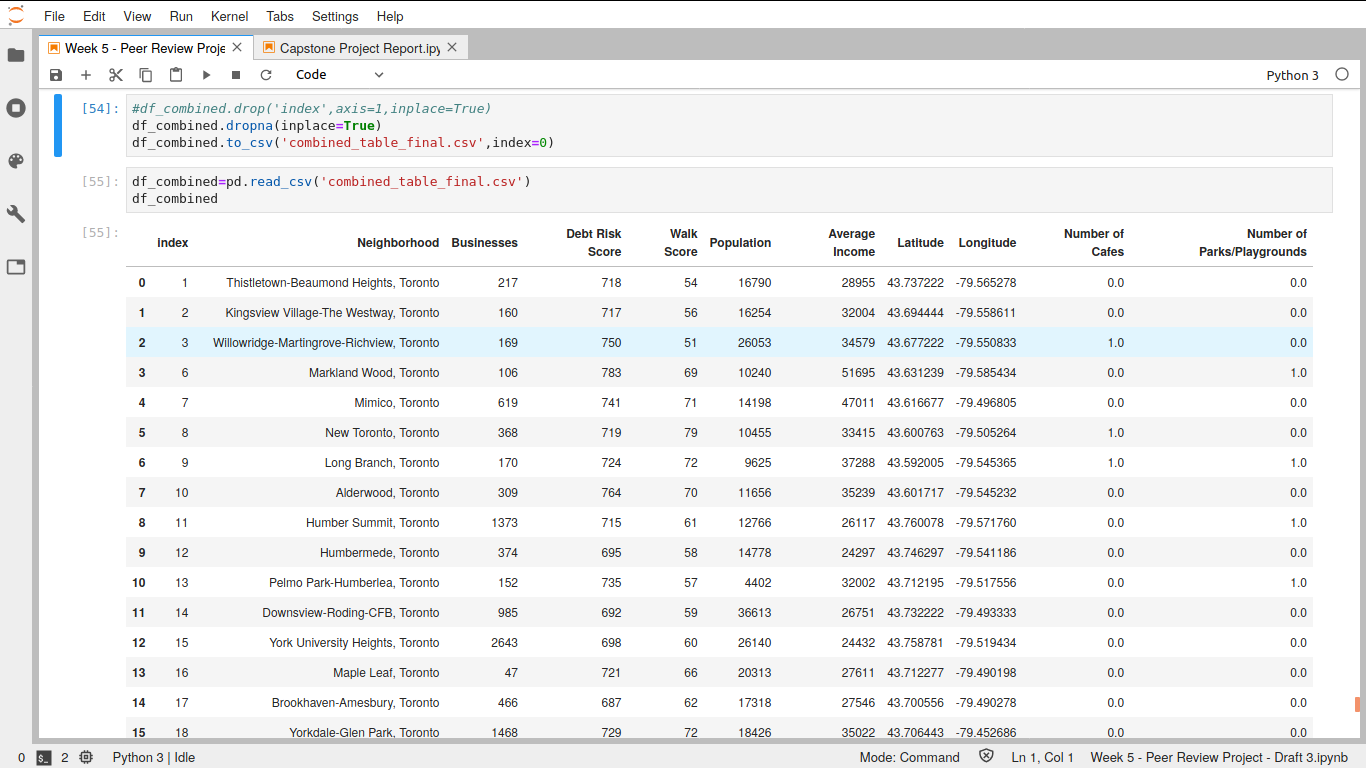

In [3]:
Image(filename="Screenshot from 2020-05-24 12-05-13.png")

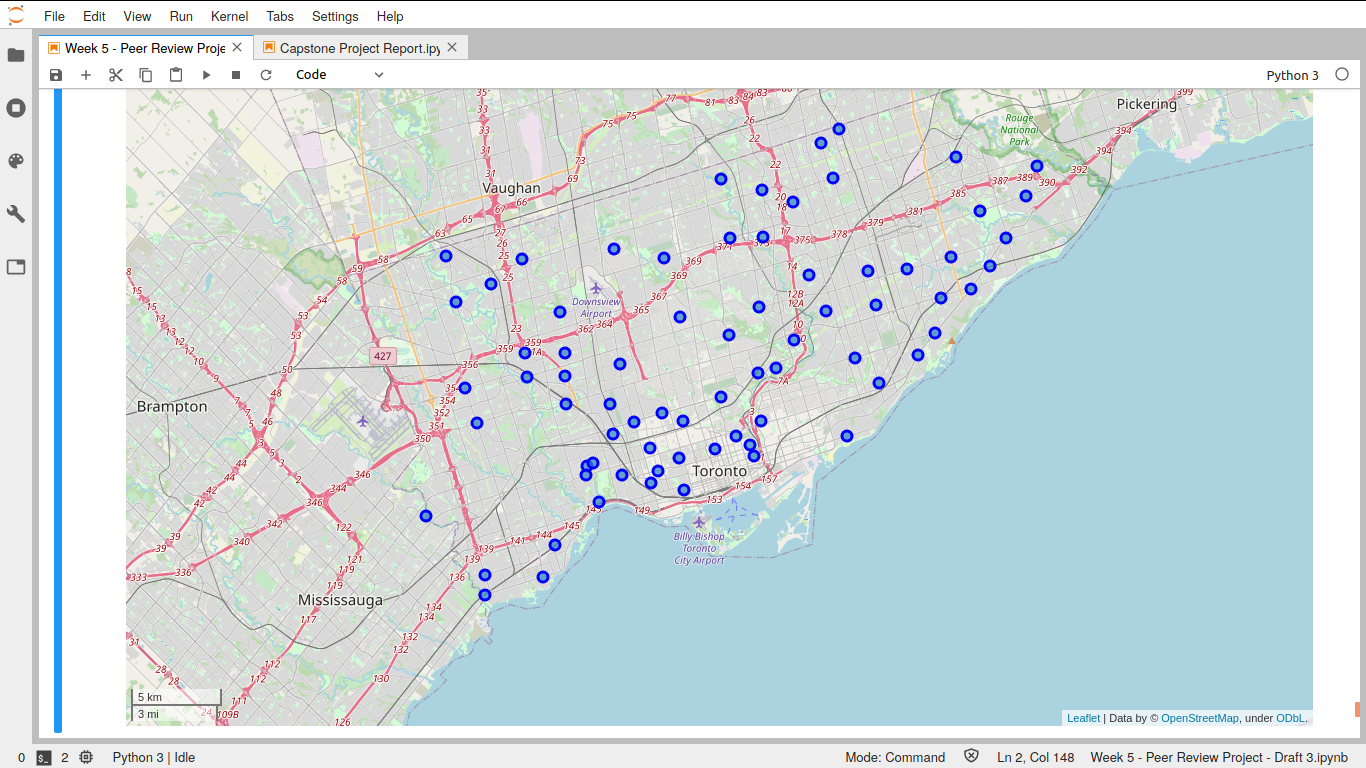

In [4]:
Image(filename='Screenshot from 2020-05-24 12-05-39.png')

The clustering method from SciKit Learn package was used to carry out K means clustering. It was set to produce 8 clusters where centroid of each cluster is defined by corresponding values of the 7 features. The coordinates of the cluster centroids and their Euclidean distance from the origin are shown in the df_centroids dataframe below. The centroids of clusters 5 and 6 stand out for their large Eucliean distance. Both are approximately twice farther away from the origin than the centroid of cluster 0, which comes in a distant third. 

The clustering_data dataframe attaches labels to each neighborhood specifying the cluster to which they belong.

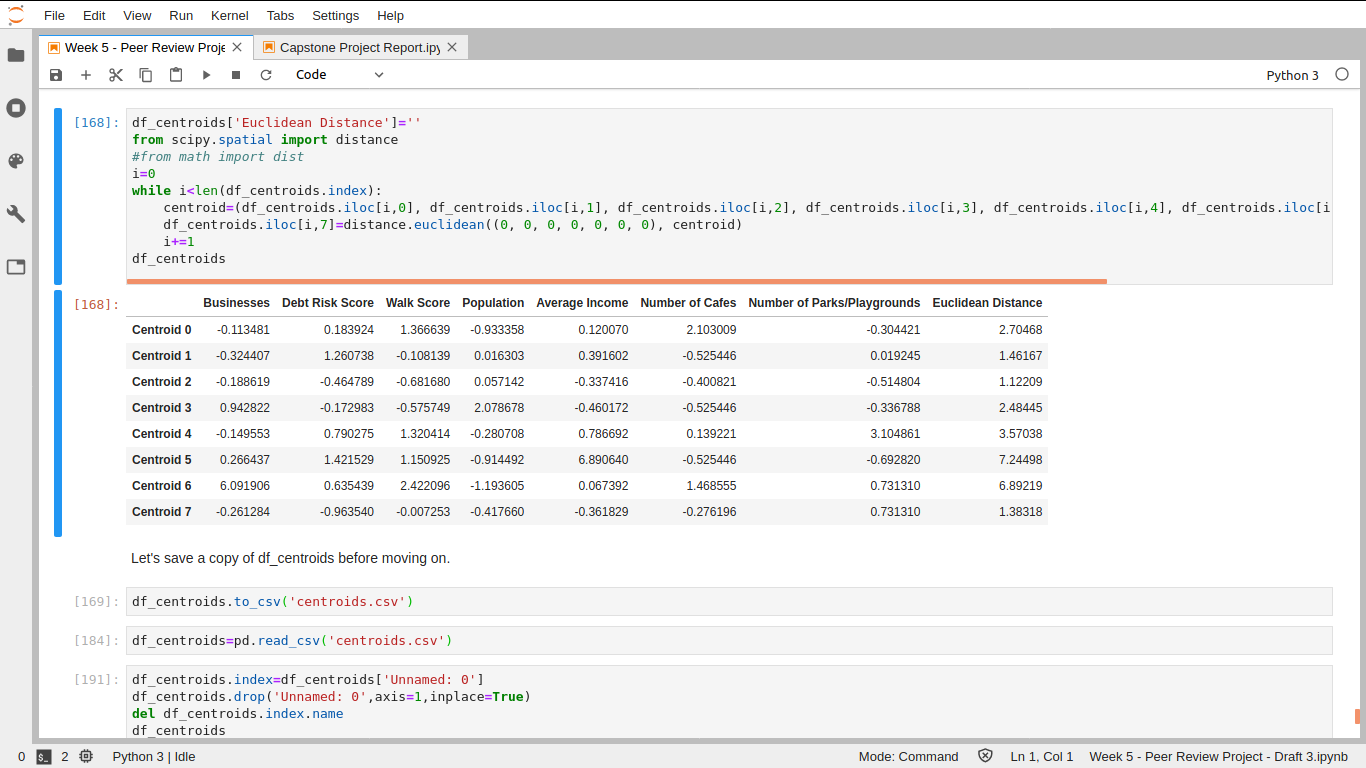

In [5]:
Image(filename='Screenshot from 2020-05-25 13-28-55.png')

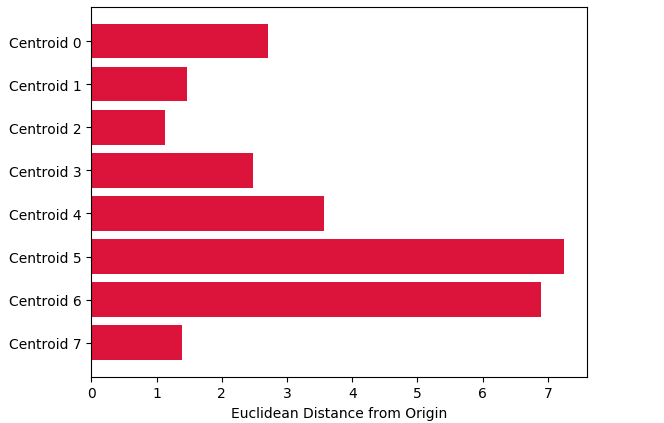

In [6]:
Image(filename='Selection_001.png')

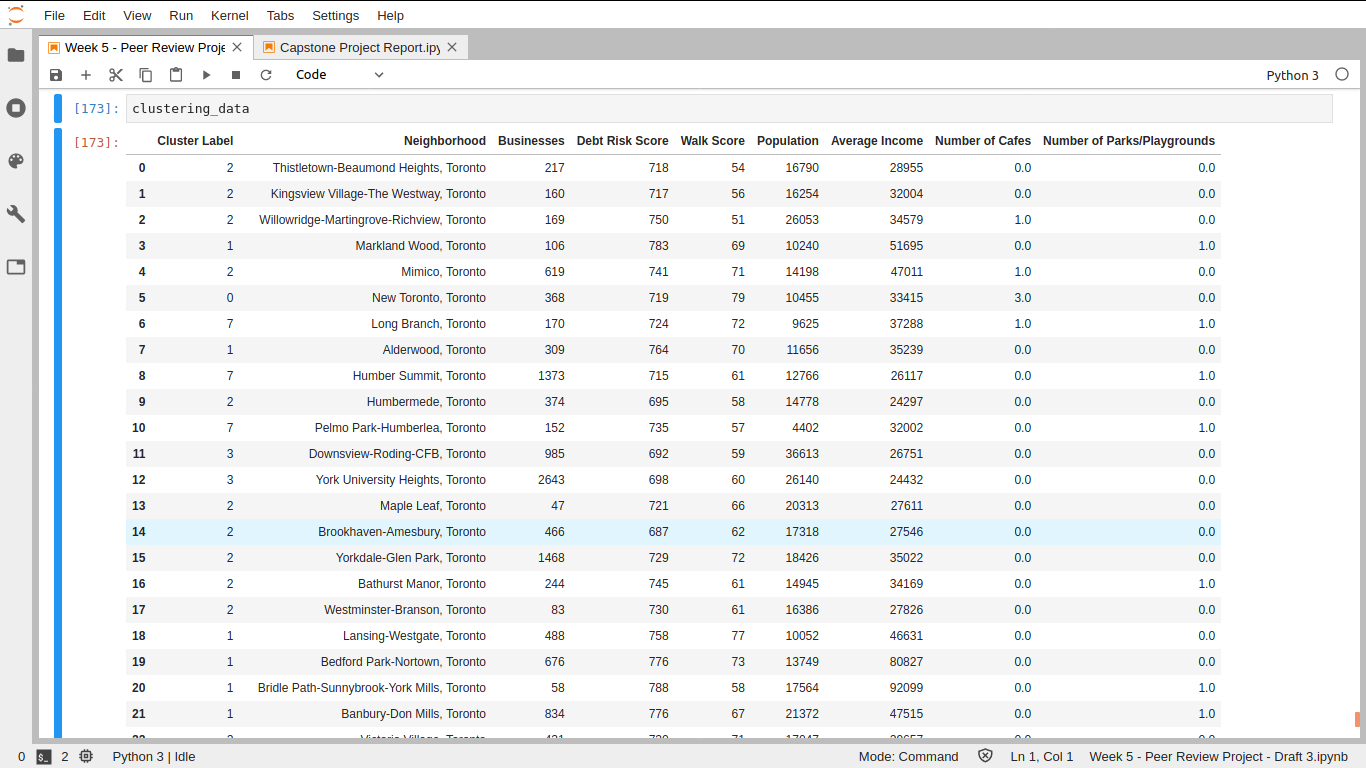

In [7]:
Image(filename='Screenshot from 2020-05-25 13-29-23.png')

Clusters 5 and cluster 6 have only one neighborhood each. The two clusters were combined to create the Preferred_Neighborhood dataframe. As the name suggests, the two neighborhoods listed in the dataframe: Bay St Corridor and Rosedale-Moore Park, have the highest prospect at absorbing a new coffee shop and making it a success.

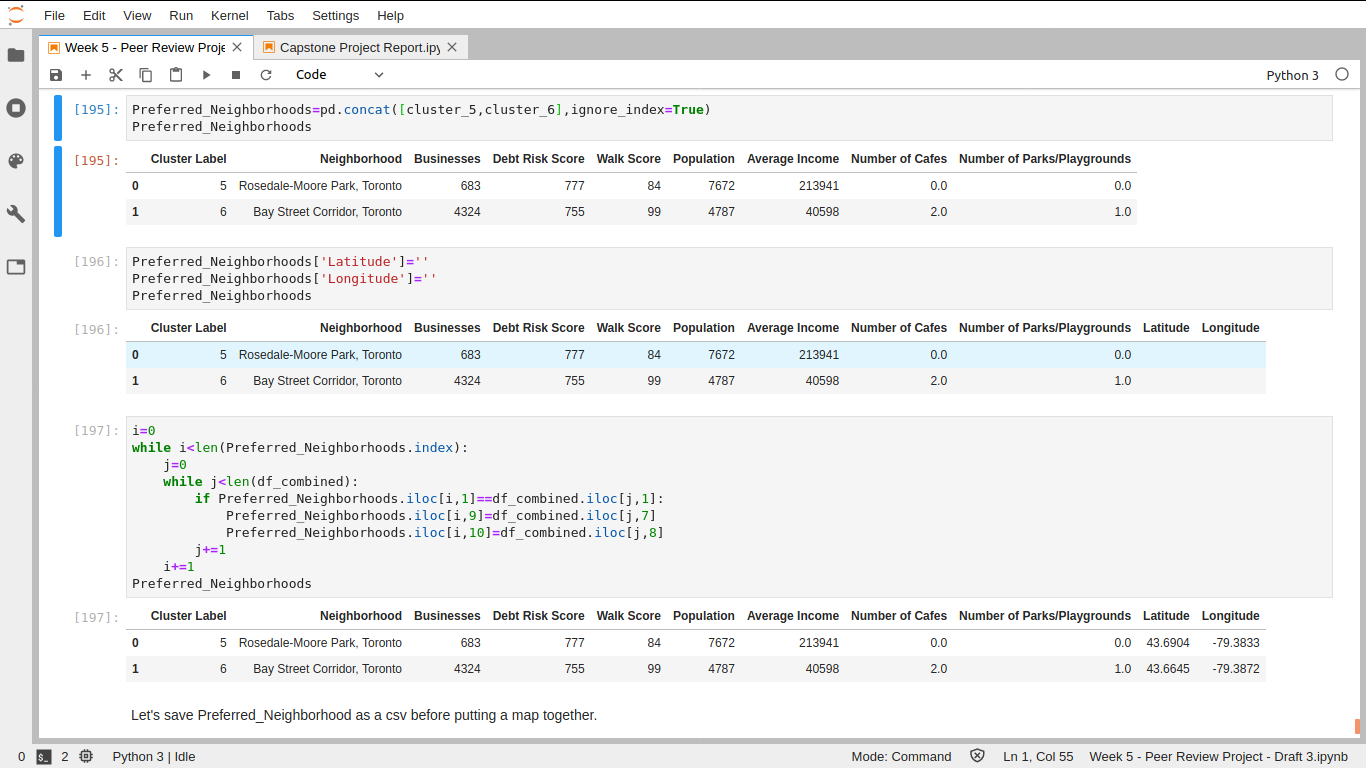

In [8]:
Image(filename='Screenshot from 2020-05-25 13-30-12.png')

Charts below illustrate how the two neighborhoods match up head to head.

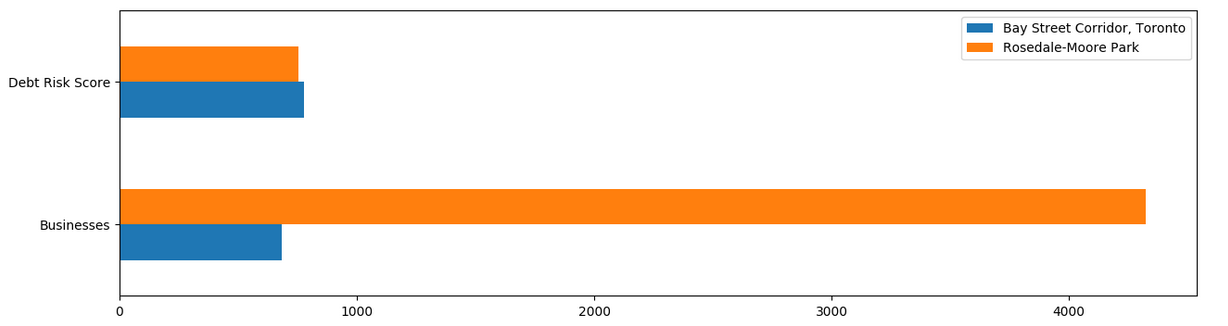

In [9]:
Image(filename='Selection_002.png')

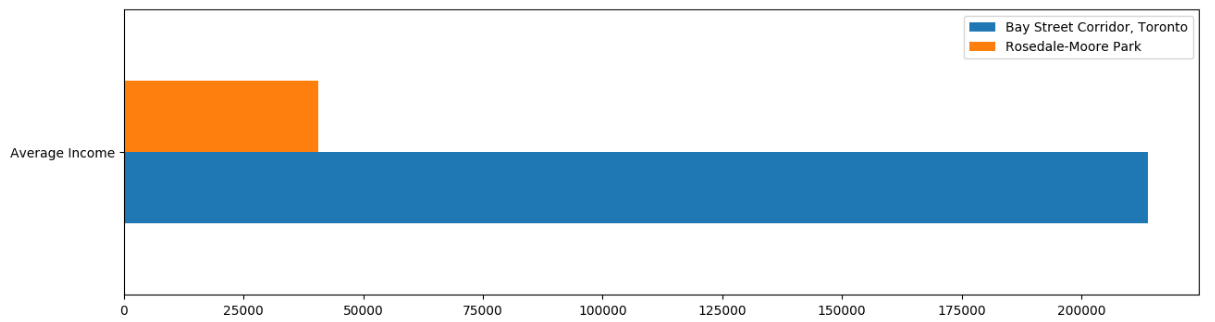

In [10]:
Image(filename='Selection_003.png')

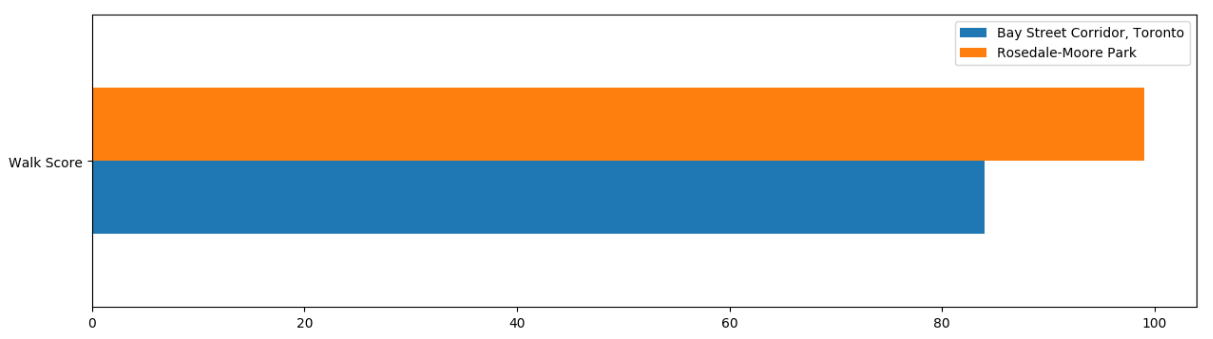

In [11]:
Image(filename='Selection_004.png')

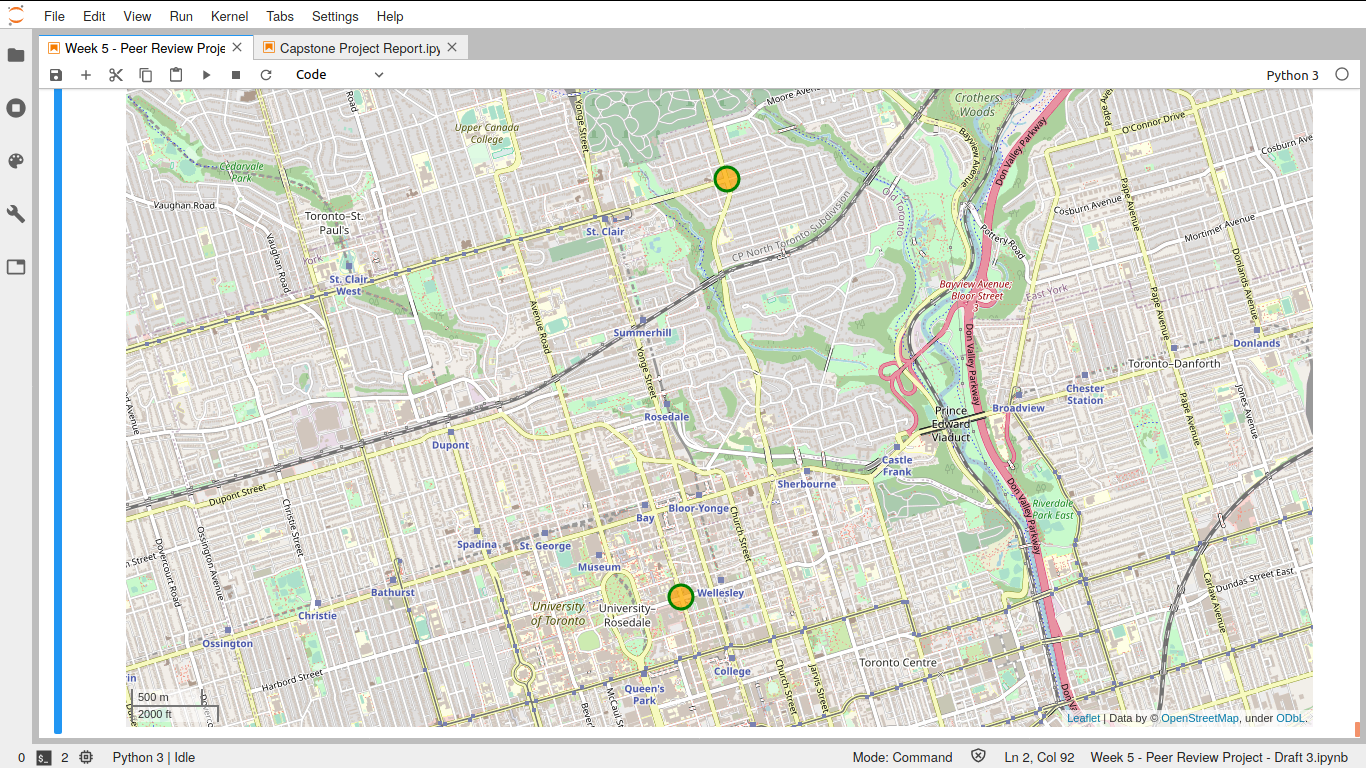

In [12]:
Image(filename='Screenshot from 2020-05-24 12-09-26.png')

<br>The proximity between the two neighborhoods is obvious (marked in yellow circles with green borders). They are located less than 5 miles of each other, an indication that they may share some of the traffic in the area.

## Discussion

Caveats: Just a few caveats before going into the actual discussion part:

i) I could not find complete information on all 140 census recognized neighborhoods in Toronto. Only 74 Toronto neighborhoods were ultimately included in the analysis.

ii) This is just an academic exercise. I have never been to Toronto and my knowlege about the city is limited to the Google searches for this study. So  some of my conclusions might seem obvious or ridiculous to someone familiar with the area.

Eight clusters were created by K mean clustering 74 Toronto neighborhoods based on seven desirable features. The two neighborhoods selected in the end are 'Bay Street Corridor' and 'Rosedale-Moore Park'. The two neighborhoods have numerous established and successful businesses. Residents of Rosedale-Moore Park are affluent and those in "Bay Street Corridor' are very close to being top 25% of earners in Toronto. Both neighborhood have residents with high credit scores and are very walkable. As a bonus the two neighborhoods are within 5 km (~3.1 mi) of each other, likely sharing some traffic.

There are a few differences in the neighborhoods too. Bay Street Corridor is the financial district of Toronto and a major thoroughfare in the Downtown area. Rosedale-Moore Park is an affluent neighborhood with lots of green space. It has been ranked as the best neighborhood in Toronto to live by Toronto Life. 

What's interesting is in spite of the differences, both draw new faces from outside on top of the local residents. And both have more than enough financial strength to easily integrate a new business, provided it has a good concept which is executed well. This is where people making the business decisions need to take over. The ultimate choice will depend on their budget, past experiences and what they feel comfortable with as a company.

## Conclusion

There are 140 census recognized neighborhoods in Toronto. The goal of the project was to create a short list of 1 to 5 neighborhoods where opening a new coffee shop would make good business sense. Cluster analysis (K means) was performed on 74 neighborhoods for which I could find all the necessary data on the factors discussed in the introduction section. The two neighborhoods finally chosen are: Bay Street Corridor and Rosedale-Moore Park. Bay Street Corridor is a busy thoroughfare in the financial district of Toronto and Rosedale-Moore Park is an affluent neighborhood with a lot of green space. In spite of their differences both are financially strong, have the ability to draw new people and are walkable; the perfect combination for a new coffee shop. People making the business decisions will decide which neighborhood to go with based on budget, experience and the style of business they are comfortable with.

## Acknowledgment

The list of packages used in the various steps of this project includes numpy, scipy, pandas, request, BeautifulSoup, matplotlib, functools, folium and Scikit-Learn. Special thanks to all the contributors of these free open source packages for giving so much to the community.

## References

1. https://developer.foursquare.com/places
2. https://nominatim.org/
3. https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods
4. https://open.toronto.ca/catalogue/?sort=last_refreshed%20desc